In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import kagglehub
path = kagglehub.dataset_download("hijest/englishrussian-dictionary-for-machine-translate")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'englishrussian-dictionary-for-machine-translate' dataset.
Path to dataset files: /kaggle/input/englishrussian-dictionary-for-machine-translate


In [3]:
import string
import re
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd

# Путь к вашему файлу
text = "/kaggle/input/englishrussian-dictionary-for-machine-translate/rus.txt"

# Чтение файла и обработка строк
with open(text, encoding='utf-8') as file:
    lines = file.read().split("\n")

pairs = []

for line in lines:
    parts = line.split("\t")
    if len(parts) >= 2:
        english, russian = parts[0], parts[1]
        # Цель — английский русский
        english = "[start] " + english + " [end]"
        pairs.append((russian, english))

In [4]:
df = pd.DataFrame(pairs)
df.head(20)

,0,1
0,Марш!,[start] Go. [end]
1,Иди.,[start] Go. [end]
2,Идите.,[start] Go. [end]
3,Здравствуйте.,[start] Hi. [end]
4,Привет!,[start] Hi. [end]
5,Хай.,[start] Hi. [end]
6,Здрасте.,[start] Hi. [end]
7,Здоро́во!,[start] Hi. [end]
8,Беги!,[start] Run! [end]
9,Бегите!,[start] Run! [end]


Максимальная длина английского предложения: 103
Максимальная длина русского предложения: 80


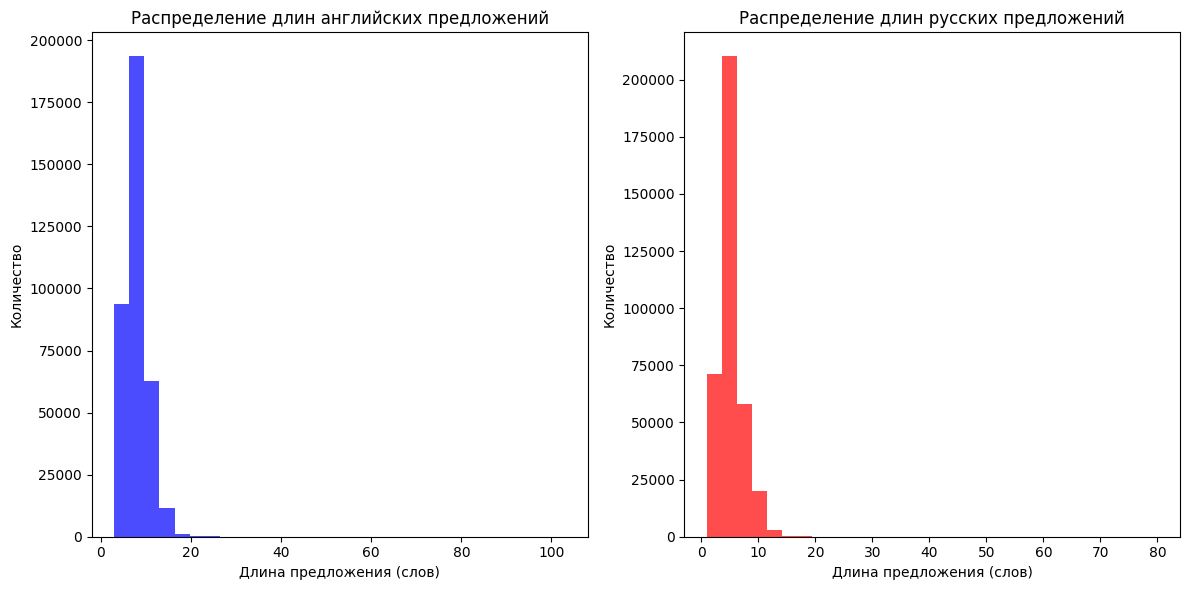

In [5]:
import matplotlib.pyplot as plt

# Собираем длины предложений
english_lengths = [len(pair[1].split()) for pair in pairs]
russian_lengths = [len(pair[0].split()) for pair in pairs]

# Находим максимум
max_english_length = max(english_lengths)
max_russian_length = max(russian_lengths)

print(f"Максимальная длина английского предложения: {max_english_length}")
print(f"Максимальная длина русского предложения: {max_russian_length}")

# Построение гистограммы
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(english_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Распределение длин английских предложений')
plt.xlabel('Длина предложения (слов)')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
plt.hist(russian_lengths, bins=30, color='red', alpha=0.7)
plt.title('Распределение длин русских предложений')
plt.xlabel('Длина предложения (слов)')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

In [6]:
import random
print(random.choice(pairs))
print(len(pairs))

('Может, Том меня не помнит.', "[start] Maybe Tom doesn't remember me. [end]")
363386


In [7]:
random.shuffle(pairs)
num_val_samples = int(0.01 * len(pairs))
num_train_samples = len(pairs) - 2 * num_val_samples
train_pairs = pairs[:num_train_samples]
val_pairs = pairs[num_train_samples:num_train_samples + num_val_samples]
test_pairs = pairs[num_train_samples + num_val_samples:]

In [8]:
print(len(train_pairs))
print(len(val_pairs))
print(len(test_pairs))

356120
3633
3633


In [9]:
strip_chars = string.punctuation + "." + "," + "?" + "!"

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", "")

In [10]:
custom_standardization(pairs)

<tf.Tensor: shape=(363386, 2), dtype=string, numpy=
array([[b'\xd0\x95\xd1\x81\xd0\xbb\xd0\xb8 \xd1\x87\xd0\xb5\xd1\x81\xd1\x82\xd0\xbd\xd0\xbe \xd1\x8f \xd0\xb5\xd0\xb3\xd0\xbe \xd0\xbd\xd0\xb5 \xd0\xbf\xd0\xbe\xd0\xbd\xd0\xb8\xd0\xbc\xd0\xb0\xd1\x8e',
        b'start to be honest i dont understand it end'],
       [b'\xd0\xaf \xd0\xbf\xd0\xbe\xd1\x87\xd1\x82\xd0\xb8 \xd1\x83\xd0\xb2\xd0\xb5\xd1\x80\xd0\xb5\xd0\xbd \xd1\x87\xd1\x82\xd0\xbe \xd0\xa2\xd0\xbe\xd0\xbc \xd1\x8d\xd1\x82\xd0\xbe\xd0\xb3\xd0\xbe \xd0\xbd\xd0\xb5 \xd0\xb4\xd0\xb5\xd0\xbb\xd0\xb0\xd0\xbb',
        b'start im pretty sure that tom didnt do that end'],
       [b'\xd0\xa2\xd0\xbe\xd0\xbc \xd1\x83\xd0\xb6\xd0\xb0\xd1\x81\xd0\xbd\xd1\x8b\xd0\xb9 \xd1\x87\xd0\xb5\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xb5\xd0\xba',
        b'start tom is a horrible person end'],
       ...,
       [b'\xd0\xa1\xd0\xba\xd0\xbe\xd0\xbb\xd1\x8c\xd0\xba\xd0\xbe \xd1\x87\xd0\xb5\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xb5\xd0\xba \xd0\xbf\xd1\x80\xd0\xb8\xd1\x88\

In [11]:
from keras import layers
vocab_size = 30000
sequence_length = 30 #было 20

source_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)
target_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization,
)
train_russian_texts = [pair[0] for pair in train_pairs]
train_english_texts = [pair[1] for pair in train_pairs]
source_vectorization.adapt(train_russian_texts)
target_vectorization.adapt(train_english_texts)

In [12]:
batch_size = 64

def format_dataset(rus, eng):
    rus = source_vectorization(rus)
    eng = target_vectorization(eng)
    return ({
        "russian": rus,
        "english": eng[:, :-1],
    }, eng[:, 1:])

In [13]:
def make_dataset(pairs):
    rus_texts, eng_texts = zip(*pairs)
    rus_texts = list(rus_texts)
    eng_texts = list(eng_texts)
    dataset = tf.data.Dataset.from_tensor_slices((rus_texts, eng_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=4)
    return dataset.shuffle(10000).prefetch(16).cache()

train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

In [14]:
for inputs, targets in train_ds.take(1):
    print(f"inputs['russian'].shape: {inputs['russian'].shape}")
    print(f"inputs['english'].shape: {inputs['english'].shape}")
    print(f"targets.shape: {targets.shape}")

inputs['russian'].shape: (64, 30)
inputs['english'].shape: (64, 30)
targets.shape: (64, 30)


In [15]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [16]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1),
             tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(
                mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        else:
            padding_mask = mask
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1)
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(
            attention_output_1 + attention_output_2)
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)

In [17]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

In [18]:
embed_dim = 256
dense_dim = 1024
num_heads = 8

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="russian")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="english")

x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)
x = layers.Dropout(0.1)(x)

decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

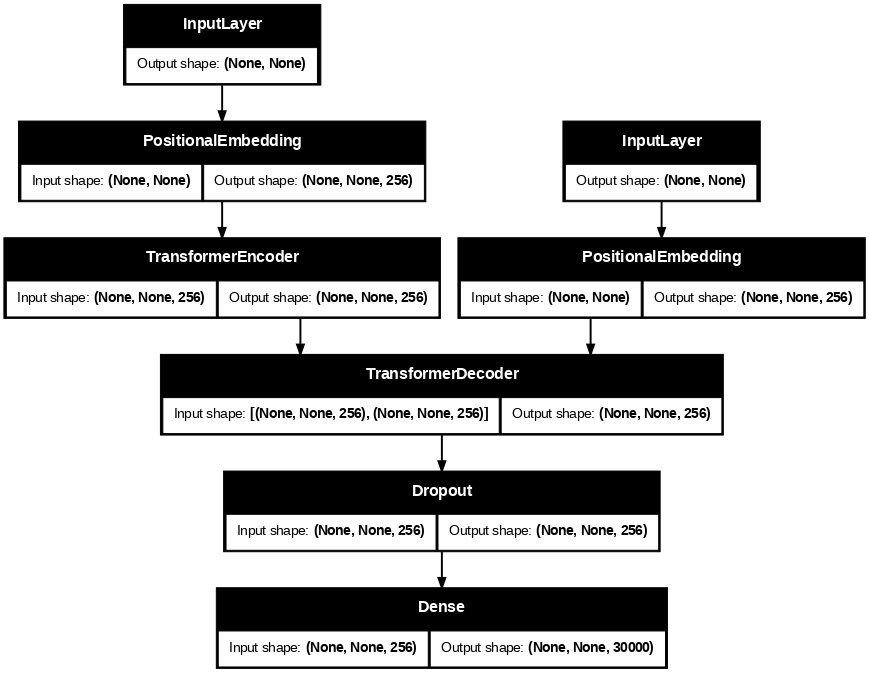

In [19]:
plot_model(model, show_shapes=True, dpi=70)

In [ ]:
callbacks = [
    # Остановит обучение, если val_loss перестанет падать в течение 3 эпох
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=3,
        restore_best_weights=True
    ),
    # Снизит скорость обучения, если прогресс замедлится
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=2
    )
]

model.compile(
    optimizer="rmsprop", # или "adam"
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(train_ds, epochs=15, validation_data=val_ds, callbacks=callbacks)

Epoch 1/15
5565/5565 ━━━━━━━━━━━━━━━━━━━━ 640s 111ms/step - accuracy: 0.8543 - loss: 0.9799 - val_accuracy: 0.9304 - val_loss: 0.3655 - learning_rate: 0.0010
Epoch 2/15
5565/5565 ━━━━━━━━━━━━━━━━━━━━ 594s 107ms/step - accuracy: 0.9355 - loss: 0.3297 - val_accuracy: 0.9433 - val_loss: 0.2837 - learning_rate: 0.0010
Epoch 3/15
5565/5565 ━━━━━━━━━━━━━━━━━━━━ 596s 107ms/step - accuracy: 0.9473 - loss: 0.2516 - val_accuracy: 0.9470 - val_loss: 0.2630 - learning_rate: 0.0010
Epoch 4/15
5565/5565 ━━━━━━━━━━━━━━━━━━━━ 596s 107ms/step - accuracy: 0.9534 - loss: 0.2127 - val_accuracy: 0.9492 - val_loss: 0.2530 - learning_rate: 0.0010
Epoch 5/15
5565/5565 ━━━━━━━━━━━━━━━━━━━━ 595s 107ms/step - accuracy: 0.9578 - loss: 0.1861 - val_accuracy: 0.9504 - val_loss: 0.2493 - learning_rate: 0.0010
Epoch 6/15
5565/5565 ━━━━━━━━━━━━━━━━━━━━ 594s 107ms/step - accuracy: 0.9612 - loss: 0.1665 - val_accuracy: 0.9513 - val_loss: 0.2492 - learning_rate: 0.0010
Epoch 7/15
5565/5565 ━━━━━━━━━━━━━━━━━━━━ 595s 107ms

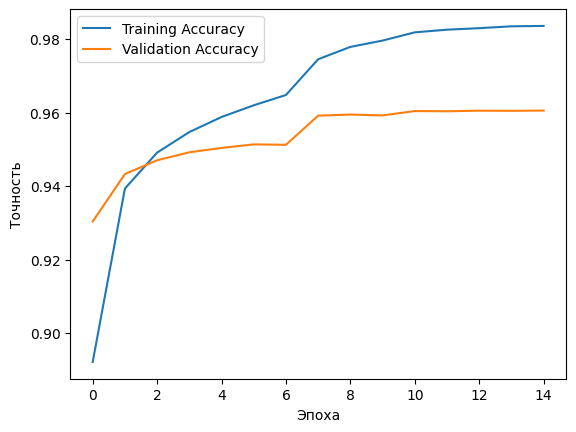

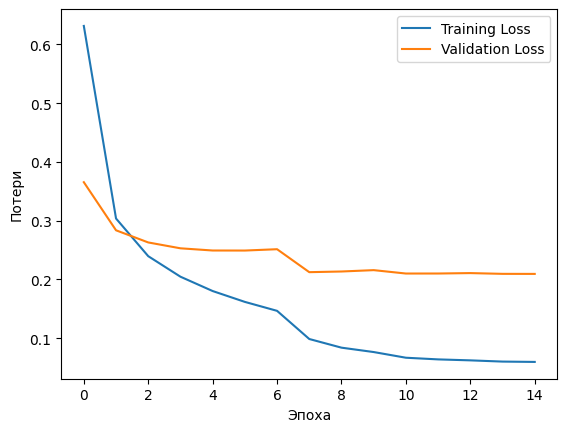

In [21]:
import matplotlib.pyplot as plt
# Построение графика точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

# Построение графика потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [22]:
import numpy as np
spa_vocab = target_vectorization.get_vocabulary()
spa_index_lookup = dict(zip(range(len(spa_vocab)), spa_vocab))
max_decoded_sentence_length = 30 #было 20

# Функция транслита
def simple_translit(word):
    translit_map = {
        'a':'а','b':'б','v':'в','g':'г','d':'д','e':'е','yo':'ё',
        'zh':'ж','z':'з','i':'и','j':'й','k':'к','l':'л','m':'м',
        'n':'н','o':'о','p':'п','r':'р','s':'с','t':'т','u':'у',
        'f':'ф','h':'х','ts':'ц','ch':'ч','sh':'ш','shch':'щ','y':'ы',
        'ye':'е','yu':'ю','ya':'я'
    }
    return ''.join([translit_map.get(ch, ch) for ch in word])

def decode_sequence(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization([decoded_sentence])[:, :-1]
        predictions = model([tokenized_input_sentence, tokenized_target_sentence])
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = spa_index_lookup[sampled_token_index]

        if sampled_token == "[end]":
            break

        if sampled_token == "[UNK]":
            # Взять последнее слово из входного предложения для транслита
            last_word = input_sentence.split()[-1]
            translit_word = simple_translit(last_word)
            decoded_sentence += " " + translit_word
        else:
            decoded_sentence += " " + sampled_token
    return decoded_sentence

In [29]:
test_ru_texts = [pair[0] for pair in test_pairs]
for _ in range(10):
    input_sentence = random.choice(test_ru_texts)
    print("-")
    print(input_sentence)
    print(decode_sequence(input_sentence))

-
Они остановились.
[start] they stopped end                           
-
Ты не против, если я с тобой пойду?
[start] do you mind if i go with you end                     
-
Ей надо было купить подержанную машину.
[start] she should have bought a used car end                      
-
Том редко говорит по-французски.
[start] tom seldom speaks french end                         
-
Вам меня слышно?
[start] can you hear me end                         
-
Кто твоя мать?
[start] whos your mother end                          
-
Том съел весь торт один.
[start] tom ate all the cake by himself end                      
-
Ты идёшь или остаёшься?
[start] are you going or stay end                        
-
Том пытался связаться с Мэри.
[start] tom tried to contact mary end                        
-
Я сама себе удивляюсь.
[start] im surprised at myself end                         


In [31]:
def translate(text):
    print(text)
    print(decode_sequence(text))
translate("Я люблю свою кошку")
translate("ты хочешь спать")
translate("мой компьютер слишком старый чтобы запустить эту игру")

Я люблю свою кошку
[start] i love my cat end                         
ты хочешь спать
[start] are you sleepy end                          
мой компьютер слишком старый чтобы запустить эту игру
[start] my computer is too old to start the game end                    


In [32]:
# Сохраняем модель
model.save("/content/model2.h5")

In [33]:
# Сохраняем векторизаторы
import pickle
with open('/content/source_vectorization2.pkl', 'wb') as f:
    pickle.dump(source_vectorization, f)
with open('/content/target_vectorization2.pkl', 'wb') as f:
    pickle.dump(target_vectorization, f)